In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xgboost
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import warnings

In [ ]:
data = pandas.read_csv('/content/drive/MyDrive/Orders/abc.csv', error_bad_lines=False, sep=";", encoding='mac_roman')
data.info()

<ipython-input-3-c2e92ea5584b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pandas.read_csv('/content/drive/MyDrive/Orders/abc.csv', error_bad_lines=False, sep=";", encoding='mac_roman')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1590 non-null   int64 
 1   ID              1590 non-null   int64 
 2   Name            1590 non-null   object
 3   City            1586 non-null   object
 4   State           1586 non-null   object
 5   Address         1590 non-null   object
 6   isCOD           1590 non-null   bool  
 7   Date_Placed     1590 non-null   object
 8   Status          1590 non-null   object
 9   IVR             1590 non-null   object
 10  Total           1590 non-null   int64 
 11  Date Delivered  1401 non-null   object
 12  Date Returned   187 non-null    object
 13  PID             1555 non-null   object
 14  Category        1587 non-null   object
 15  Quantity        1590 non-null   int64 
 16  Product Name    1590 non-null   object
dtypes: bool(1), int64(4), object(12)
memory usage: 200.4

In [ ]:
columns_using = ['Total','isCOD']
X = data[columns_using]
y = data[['Status']]
encoder = OrdinalEncoder()
train_size = 0.7

X['isCOD'] = X['isCOD'].astype('category')
X['Total'] = X['Total'].astype('category')


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, random_state=0, shuffle=False)

y_train, y_test = encoder.fit_transform(y_train), encoder.fit_transform(y_test)

<ipython-input-10-67ba133d1b77>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['isCOD'] = X['isCOD'].astype('category')
<ipython-input-10-67ba133d1b77>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['State'] = X['State'].astype('category')


In [ ]:
model = xgboost.XGBClassifier(tree_method="hist",enable_categorical=True)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score: %.2f%%" % (accuracy * 100.0))

Accuracy Score: 89.31%


In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

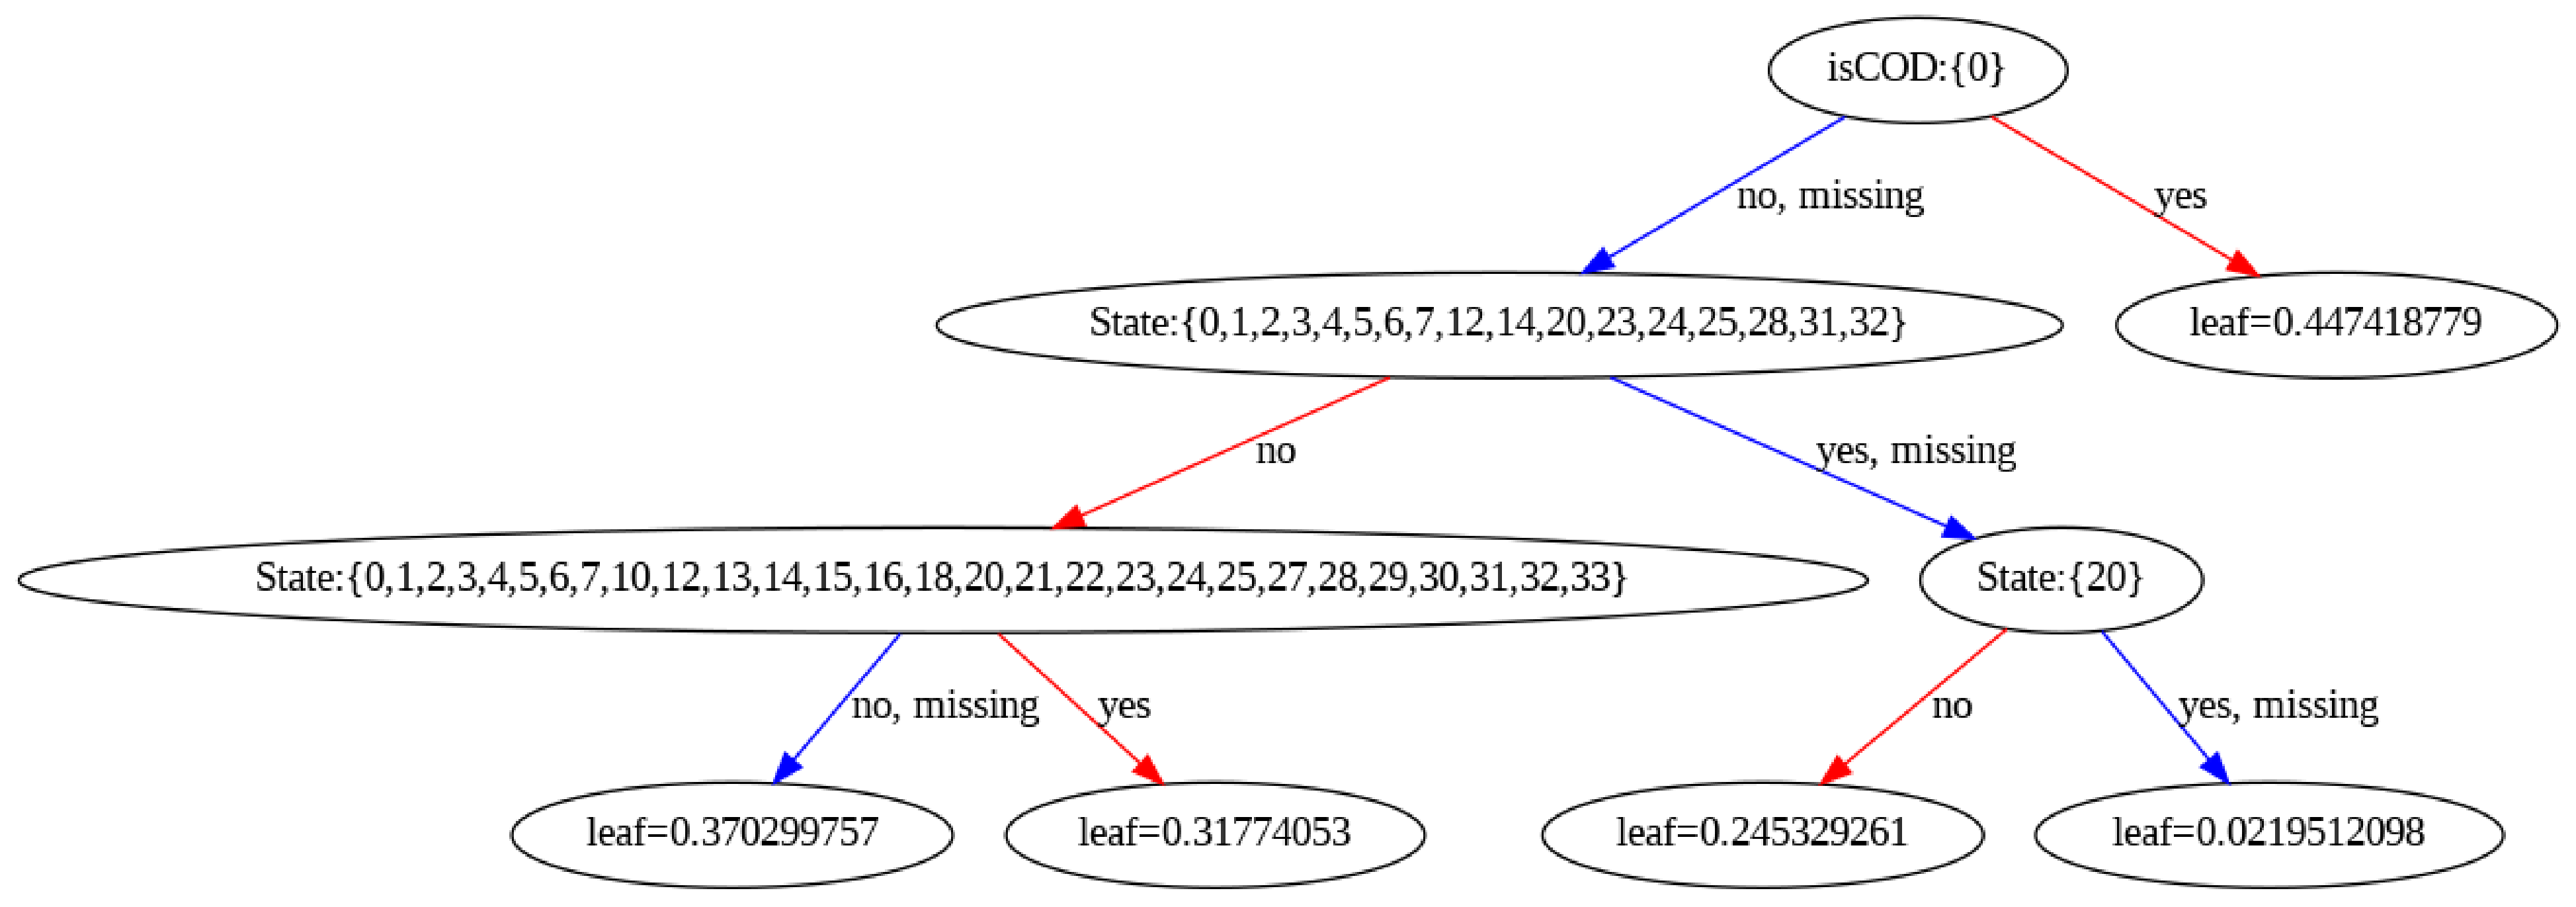

In [ ]:
# # !pip install graphviz
xgboost.plot_tree(model, trees=1)
fig = plt.gcf()
fig.set_size_inches(50, 50)
plt.show()


In [ ]:
predictions = encoder.inverse_transform(numpy.array(predictions).reshape(-1,1))
predictions = predictions.ravel()

In [ ]:
# !pip3 install openpyxl
result = data[columns_using]
result['Actual Status'] = y
result['Predicted Status'] = numpy.nan
result['Predicted Status'].iloc[int(len(data)*train_size):] = predictions
# result.to_excel('./XGBoostResult.xlsx')
result

,isCOD,Total,Actual Status,Predicted Status
0,True,999,Delivered,NaN
1,True,599,Delivered,NaN
2,True,599,Delivered,NaN
3,True,3596,Delivered,NaN
4,True,999,Delivered,NaN
...,...,...,...,...
1585,True,2876,Delivered,Delivered
1586,True,999,Delivered,Delivered
1587,True,759,Returned,Delivered
1588,False,2733,Delivered,Delivered


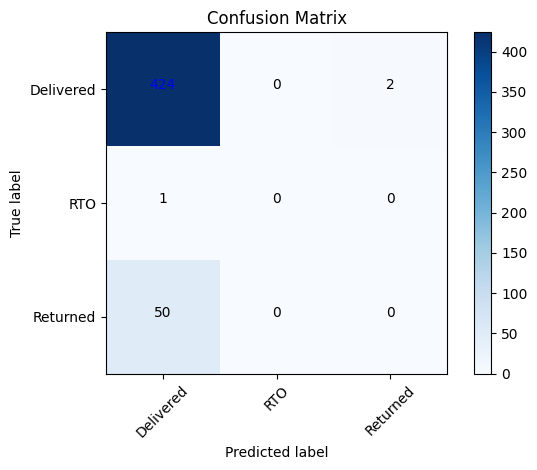

In [ ]:
cm = confusion_matrix(y_test, predictions)
classes = numpy.unique(y_test)

## Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = numpy.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

## Add labels to each cell
thresh = cm.max() / 2.
for i, j in numpy.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment='center',
             color='blue' if cm[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
!pip install graphviz
!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
pip install scikit-learn==0.22.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 417, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 320, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 194, in _build_one
    wheel_path = _build_one_inside_env(
  File "/usr/local